In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Grocery_std.csv')


In [3]:
df.head()

,Unnamed: 0,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        440 non-null    int64  
 1   Fresh             440 non-null    float64
 2   Milk              440 non-null    float64
 3   Grocery           440 non-null    float64
 4   Frozen            440 non-null    float64
 5   Detergents_Paper  440 non-null    float64
 6   Delicassen        440 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 24.2 KB


In [5]:
df.describe()

,Unnamed: 0,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,219.500000,-3.027881e-17,1.614870e-17,-5.652044e-17,5.652044e-17,4.037175e-17,2.422305e-17
std,127.161315,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,0.000000,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,109.750000,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,219.500000,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,329.250000,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,439.000000,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [6]:
df.drop(["Unnamed: 0", "Fresh", "Frozen","Detergents_Paper","Delicassen"], axis=1, inplace=True)

In [7]:
df.columns

Index(['Milk', 'Grocery'], dtype='object')

In [13]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.15, min_samples=3)

model.fit(df)

DBSCAN(eps=0.15, min_samples=3)

In [14]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1, -1, -1,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  1,  0,  0,  0,  0,
        0, -1,  0,  3,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1, -1,  2,  0,
        0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0

Text(0, 0.5, 'Grocery')

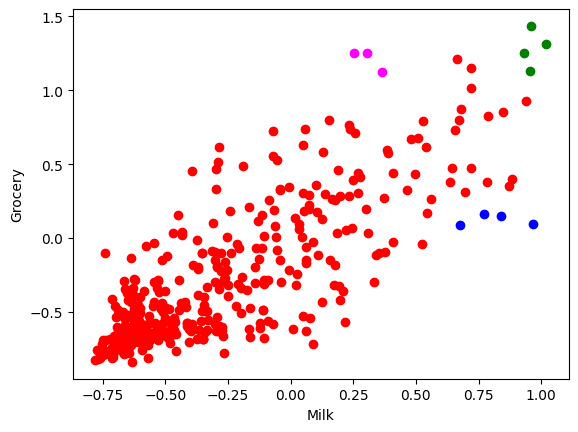

In [18]:
figure = plt.figure()

ax = figure.add_subplot(111)

colors = ['red', 'green', 'blue', 'magenta']
for index in range(len(colors)):
    ax.scatter(df['Milk'][model.labels_ == index], df['Grocery'][model.labels_ == index], color=colors[index])

plt.xlabel('Milk')
plt.ylabel('Grocery')